In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [3]:
data1 = pd.read_csv('AUDCB_050111_220324.csv', header = 0, sep = ' ')
data2 = pd.read_excel('data_82.xls', header = 0)

In [4]:
data1 = data1.iloc[595:,:]
data1 = data1['<CLOSE>']
data1 = data1.pct_change()
data1 = data1.dropna(axis = 0)
data1

596    0.005343
597   -0.000494
598    0.000271
599   -0.003245
600    0.003304
         ...   
841   -0.004317
842    0.013441
843   -0.001650
844   -0.007569
845   -0.064483
Name: <CLOSE>, Length: 250, dtype: float64

In [5]:
data2 = data2['Курс_изменения']

In [6]:
data1 = data1.rename('rate')
data2 = data2.rename('rate')

In [7]:
data = pd.concat([data2, data1*100])

In [8]:
data.index = [i for i in range(4260)]

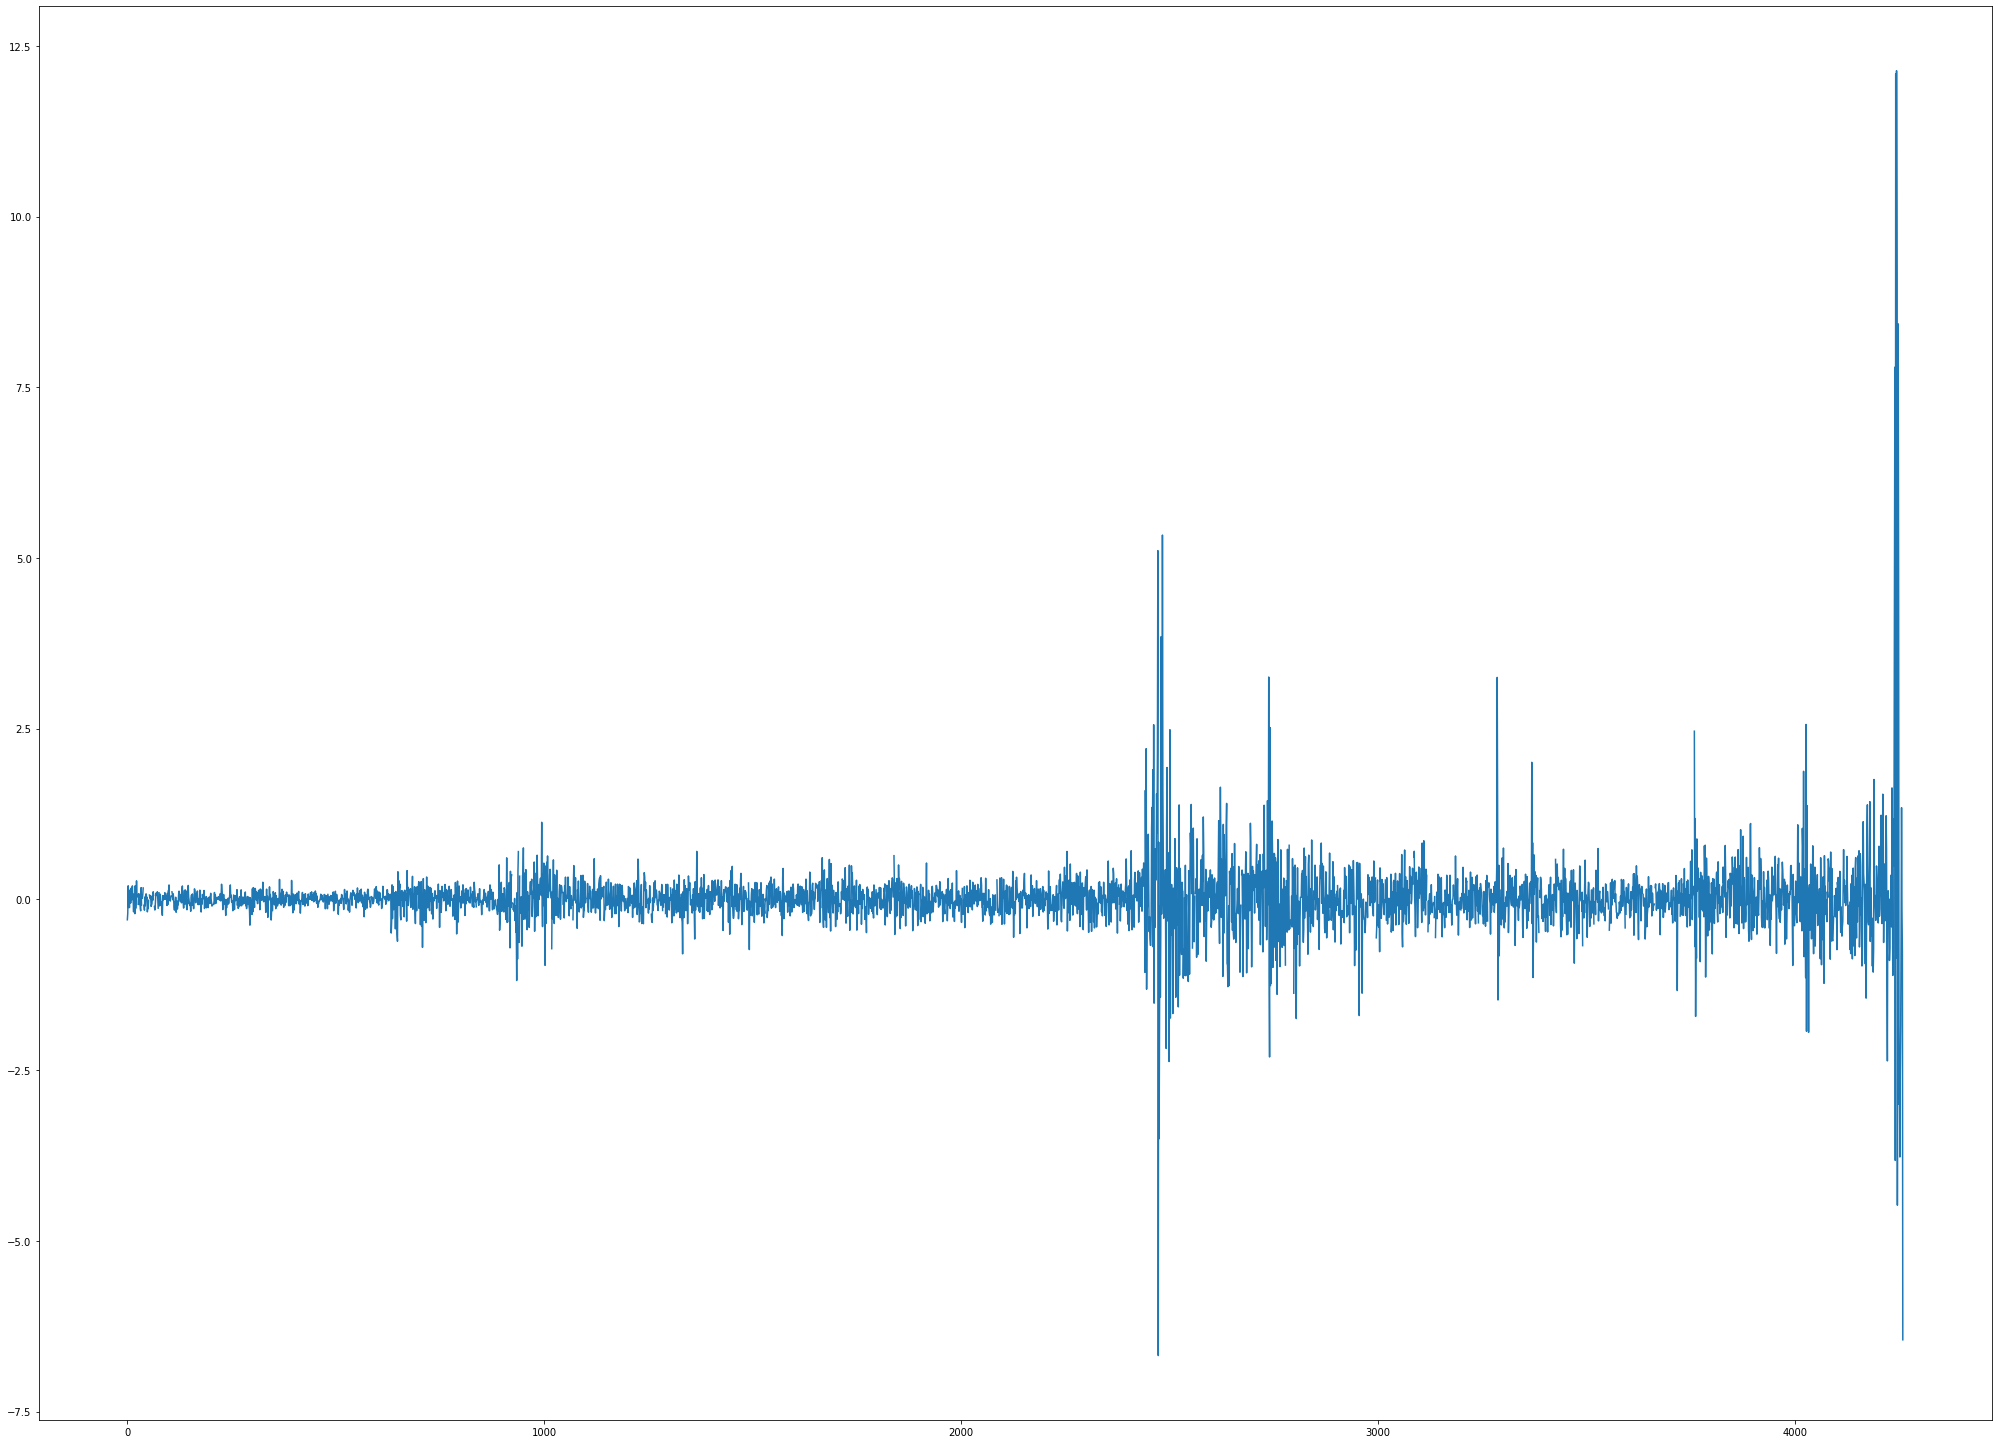

In [9]:
plt.rcParams['figure.figsize'] = 35, 26 
plt.plot(data)

In [10]:
data.index = pd.date_range(start='7/26/2010', end='03/24/2022')
data.index = pd.to_datetime(data.index, infer_datetime_format=True)

array([ 1.        ,  0.03044805,  0.09715658,  0.12323988,  0.08676774,
        0.09802122,  0.07846284, -0.04800561,  0.00423533,  0.01619638,
       -0.09141236, -0.02127836, -0.00622345, -0.01236199, -0.06101854,
       -0.07207299,  0.00447466, -0.10731043,  0.01359607, -0.05100292,
       -0.0507072 , -0.00952756,  0.01750642, -0.01516709,  0.04446414,
        0.02583338, -0.01156958,  0.00651892,  0.00482575,  0.03841796,
        0.02447754, -0.00278117,  0.00196434,  0.04641848,  0.00887552,
       -0.00964003,  0.01208051])

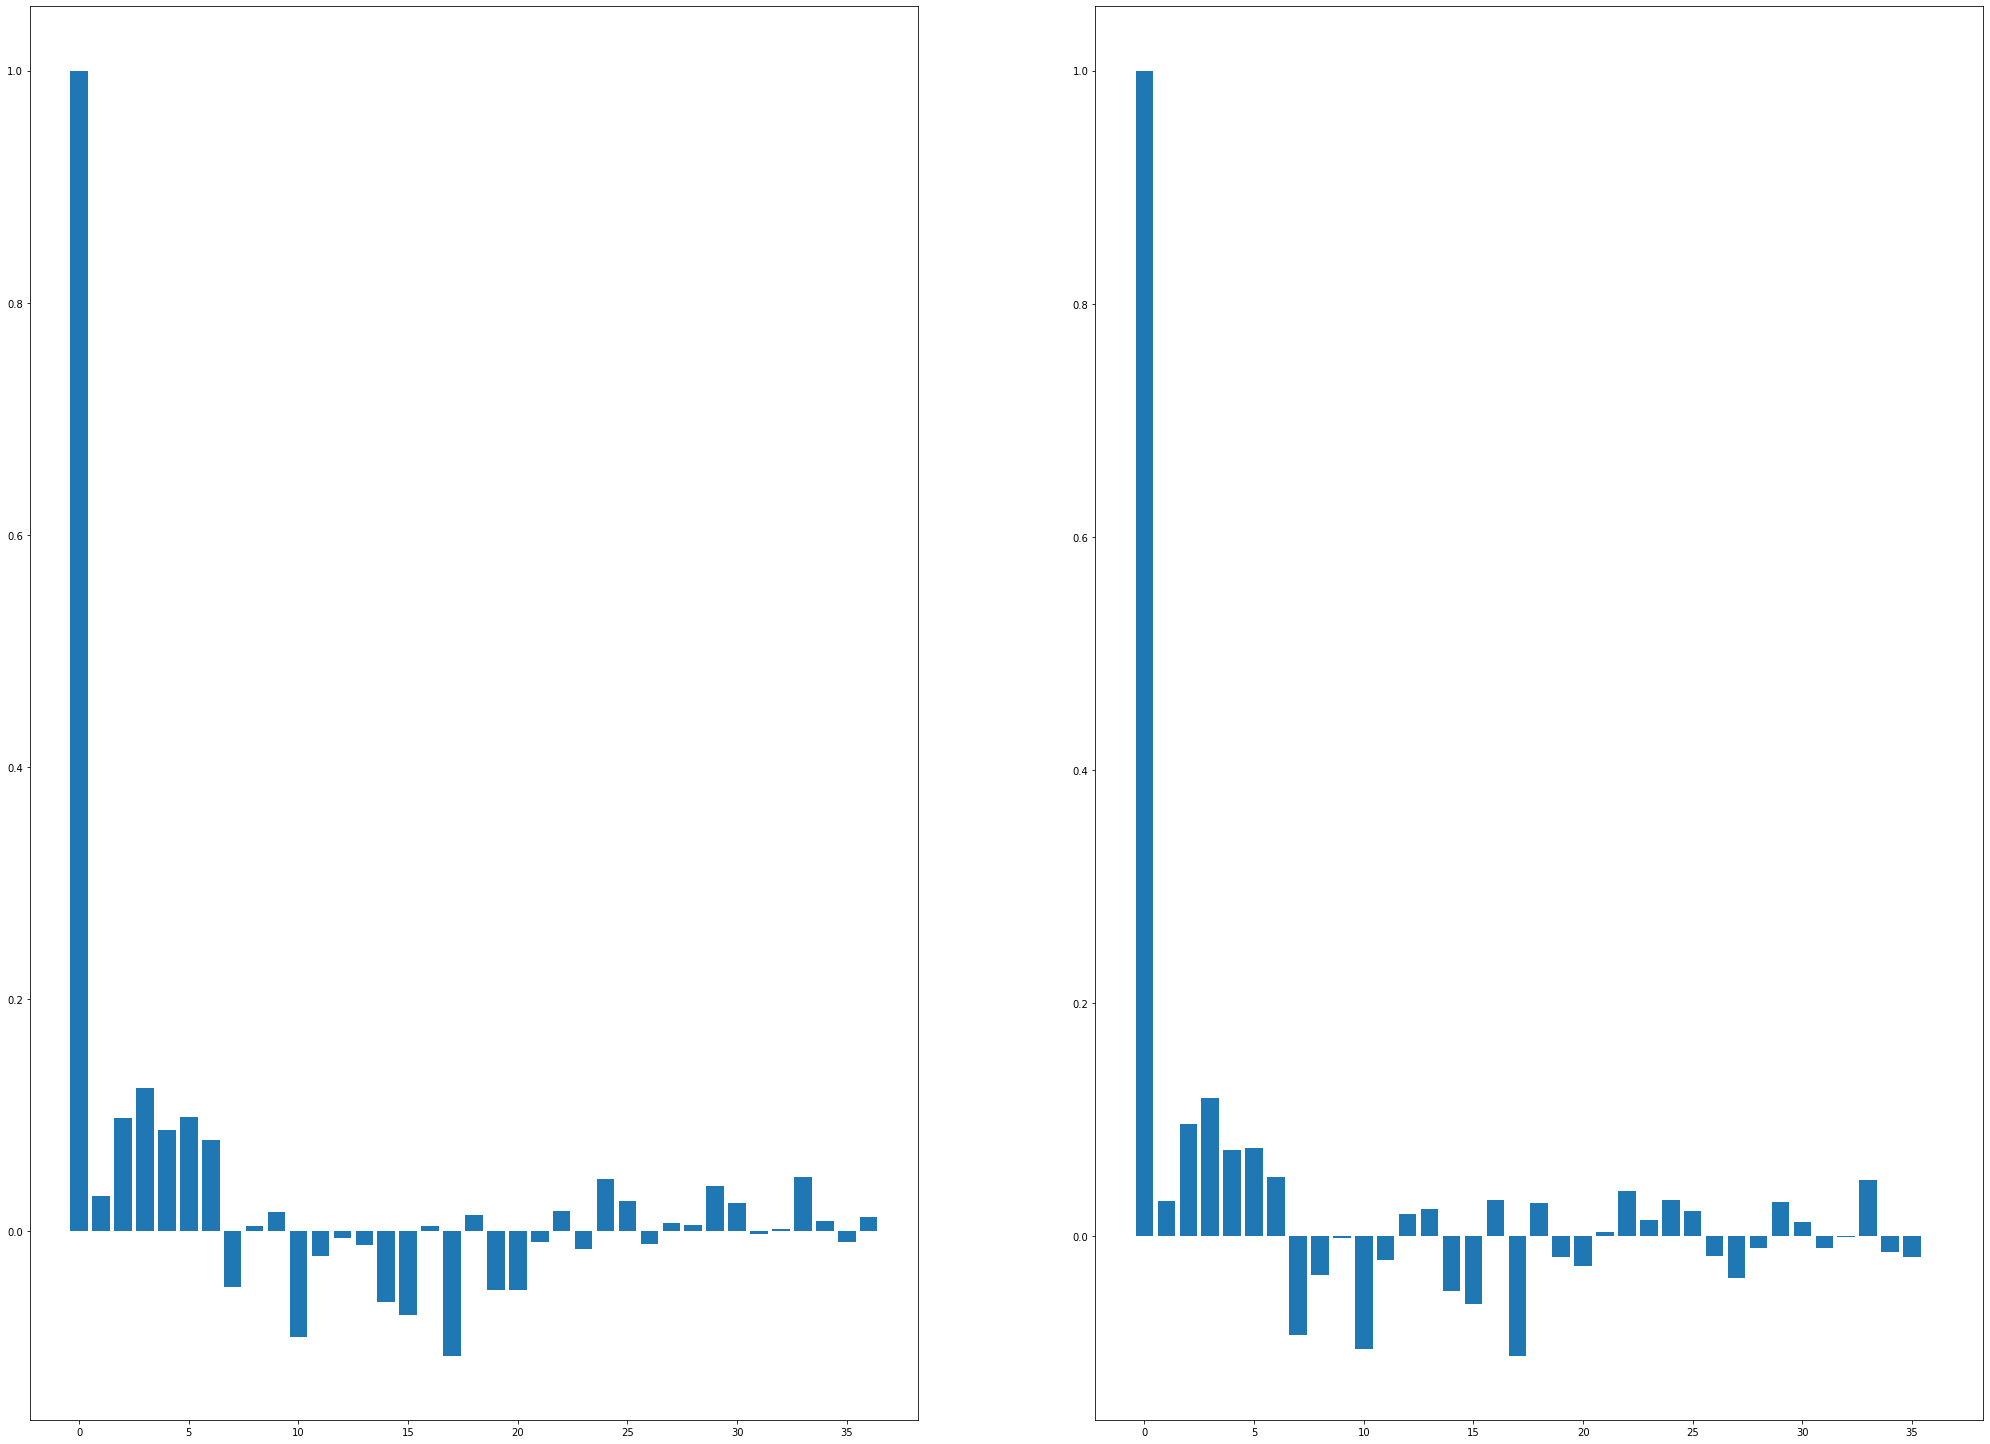

In [11]:
import statsmodels.api as sm

data = data.fillna(0)

l_acf = sm.tsa.acf(data)
l_pacf = sm.tsa.pacf(data)

plt.figure()
plt.subplot(121)
plt.bar([i for i in range(37)], l_acf)
plt.subplot(122)
plt.bar([i for i in range(37)], l_pacf)
l_acf
#-3, -10 and -17

In [12]:
data[data == np.nan]

Series([], Freq: D, Name: rate, dtype: float64)

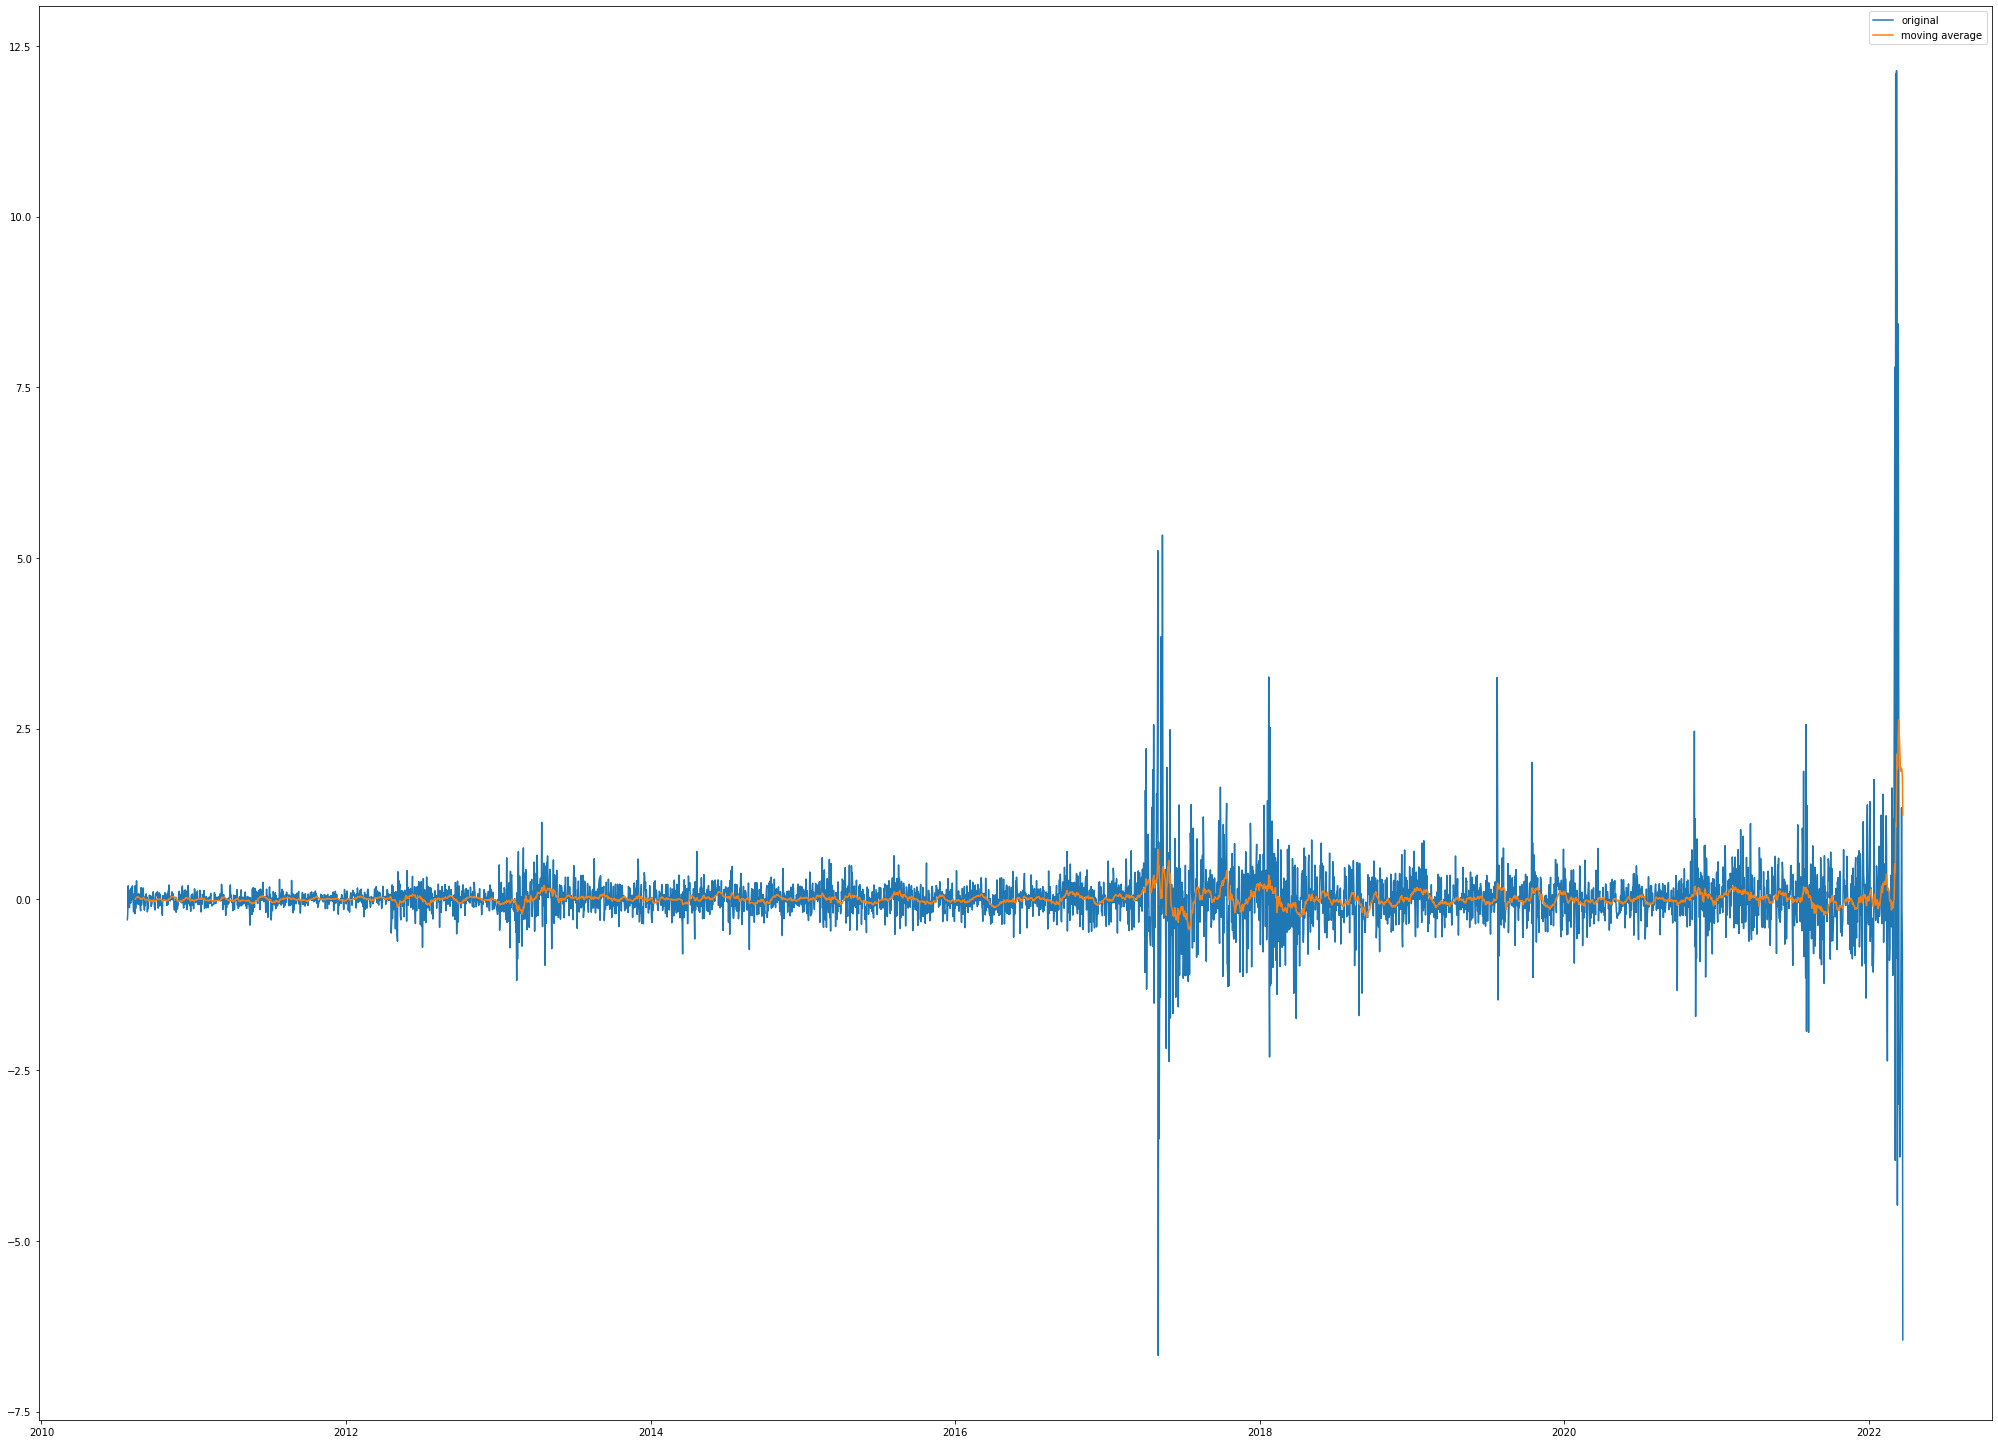

In [13]:
rm = data.rolling(window = 20).mean()
orig = plt.plot(data, label = 'original')
rmean = plt.plot(rm, label = 'moving average')
plt.legend(loc='best')
plt.show(block=True)

In [14]:
df = pd.DataFrame()
for i in [17, 10, 3, 0]:
    df['t-'+str(i)] = rm.shift(i)
df = df.dropna()
df = df.rename(columns = {'t-0':'t'})

In [15]:
y = df['t']
x = df.drop('t', axis = 1)

In [16]:
x

,t-17,t-10,t-3
2010-08-31,0.003515,0.031035,0.006125
2010-09-01,0.011830,0.029590,0.003290
2010-09-02,0.023380,0.028450,0.012370
2010-09-03,0.027010,0.024015,0.009145
2010-09-04,0.037190,0.023855,0.009745
...,...,...,...
2022-03-20,0.000470,2.130369,2.180480
2022-03-21,0.169083,1.906267,1.974556
2022-03-22,0.522056,1.948890,1.878240
2022-03-23,0.392182,2.405833,1.912291


In [17]:
x_train = x.iloc[:int(0.7*4224), :].values
x_test = x.iloc[int(0.7*4224):,: ].values
y_train = y.iloc[:int(0.7*4224)].values
y_test = y.iloc[int(0.7*4224):].values

In [18]:
model = Sequential()
model.add(Dense(5, input_dim = 3, activation = 'sigmoid'))
model.add(Dense(5, activation = 'sigmoid'))
model.add(Dense(3, activation = 'sigmoid'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mape'])

nn_mod = model.fit(x_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
60/60 [==============================] - 1s 3ms/step - loss: 0.8725 - mape: 17561.0664
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4822 - mape: 12347.7812
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2448 - mape: 8793.2148
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1129 - mape: 6206.7036
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0486 - mape: 3777.5261
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0212 - mape: 2396.1660
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0111 - mape: 1248.6058
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0079 - mape: 745.7303
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0070 - mape: 436.5479
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0068 - mape: 289.3456
Epoch 11/100
60/60 [

60/60 [==============================] - 0s 3ms/step - loss: 0.0026 - mape: 292.7186
Epoch 85/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0025 - mape: 301.4696
Epoch 86/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0025 - mape: 300.6584
Epoch 87/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0025 - mape: 303.1668
Epoch 88/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0024 - mape: 309.8409
Epoch 89/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0024 - mape: 305.4215
Epoch 90/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0024 - mape: 312.6248
Epoch 91/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0024 - mape: 304.0948
Epoch 92/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0023 - mape: 318.5902
Epoch 93/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0023 - mape: 301.4167
Epoch 94/100
60/60 [=============

In [19]:
err = model.evaluate(x_test, y_test)
err[1]

40/40 [==============================] - 0s 2ms/step - loss: 0.0427 - mape: 246.6924


246.69235229492188

In [20]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
len(y_train)

2956

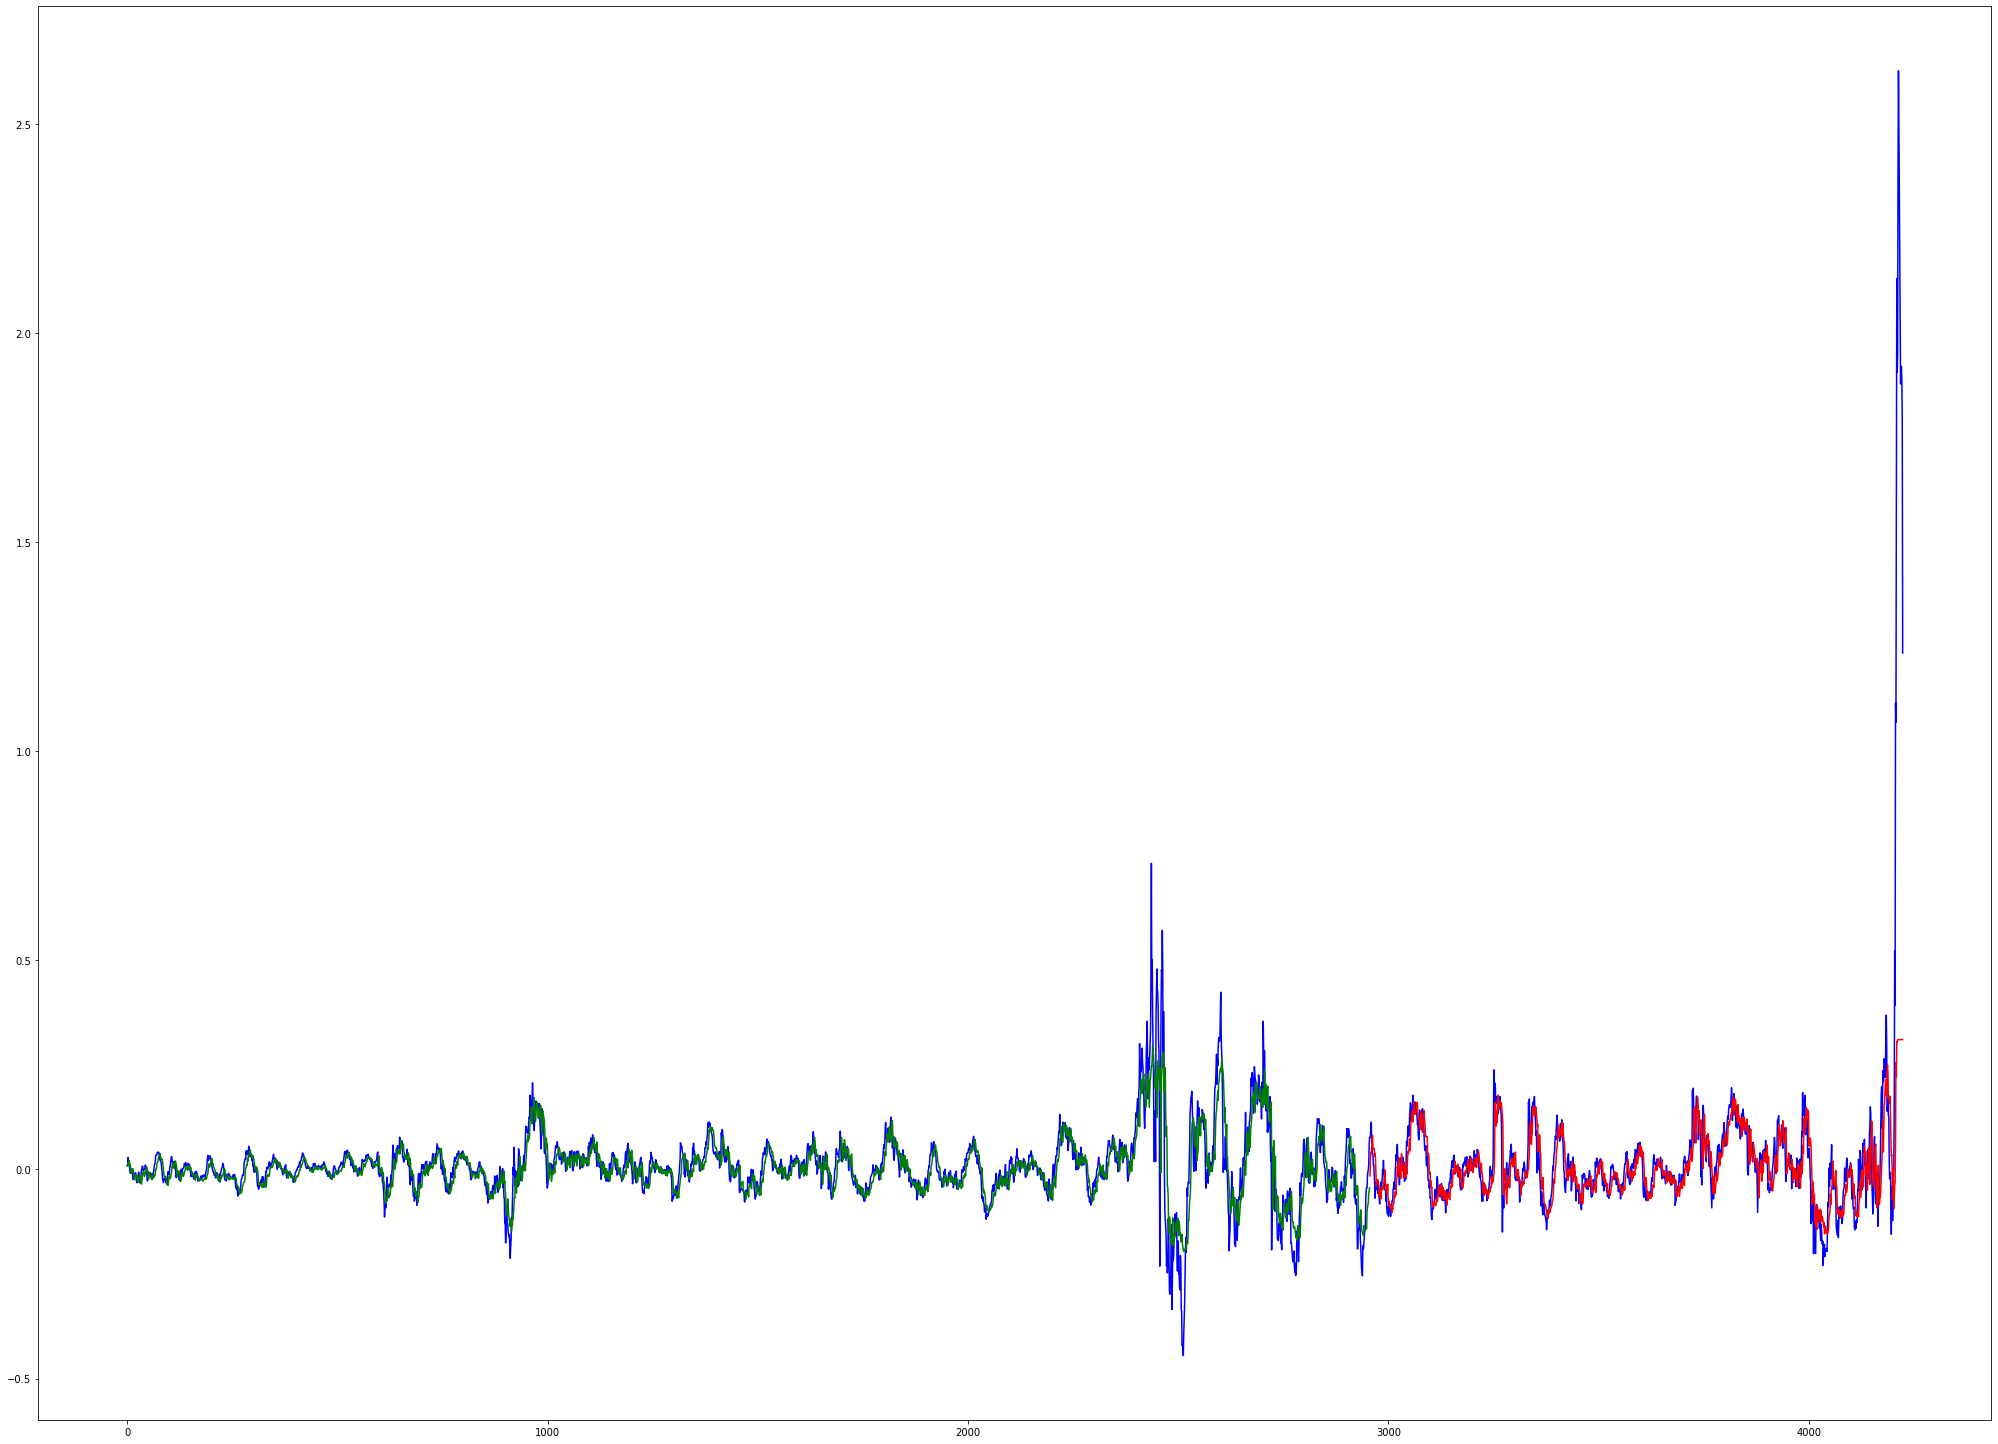

In [21]:
x2 = np.arange(0, int(0.7*4224), 1)
x3 = np.arange(int(0.7*4224), 4224, 1)

plt.plot(x2, y_train, color='blue')
plt.plot(x2, pred_train, color='green')
plt.plot(x3, y_test, color='blue')
plt.plot(x3, pred_test, color='red')

In [27]:
df

,t-17,t-10,t-3,t
2010-08-12,-0.297600,0.111400,-0.022500,0.059300
2010-08-13,-0.202200,-0.052600,-0.181600,-0.208500
2010-08-14,0.199700,0.164600,0.081700,0.200700
2010-08-15,-0.118200,0.012000,0.059300,-0.131300
2010-08-16,0.073800,-0.002100,-0.208500,0.028800
...,...,...,...,...
2022-03-20,1.256706,9.075759,-3.771314,-0.431665
2022-03-21,4.597948,-4.476707,-2.485330,1.344081
2022-03-22,7.794356,-0.040756,-1.831819,-0.165009
2022-03-23,-3.821754,8.428052,-0.431665,-0.756864


In [22]:
for_forecast = pd.DataFrame()
for_forecast['t-17'] = data[4224-17:]
for_forecast['t-10'] = data[4224-10:]
for_forecast['t-3'] = data[4224-3:]

In [23]:
for_forecast = for_forecast.dropna()

In [24]:
for_forecast = for_forecast.values

In [25]:
forecast = model.predict(for_forecast)
forecast

array([[-0.21585463],
       [-0.21620795],
       [ 0.0493955 ],
       [ 0.12543368],
       [-0.11958274],
       [ 0.00087321],
       [-0.21465108],
       [-0.21248269],
       [-0.03934734],
       [-0.17257442],
       [ 0.25748473],
       [-0.19712476],
       [ 0.3102619 ],
       [ 0.09467208],
       [-0.21563144],
       [ 0.30940747],
       [ 0.28380126],
       [ 0.30968434],
       [ 0.310413  ],
       [ 0.310413  ],
       [-0.21621127],
       [ 0.310413  ],
       [-0.21440727],
       [ 0.310413  ],
       [ 0.310413  ],
       [-0.21621127],
       [-0.04515558],
       [ 0.310413  ],
       [ 0.310413  ],
       [-0.21621099],
       [-0.21620913],
       [-0.21621127],
       [-0.21620922],
       [-0.21618289],
       [-0.2000637 ],
       [ 0.30991012],
       [-0.13531339],
       [-0.21323444],
       [-0.21621127]], dtype=float32)

In [46]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as stat
def adf(ts):
	dftest = stat.adfuller(ts)
	dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
	if dftest[1] > 0.5:
		print("Process is non-stationary")
	else:
		print("Process is stationary")
        
adf(data)

Process is stationary


C:\Users\timos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


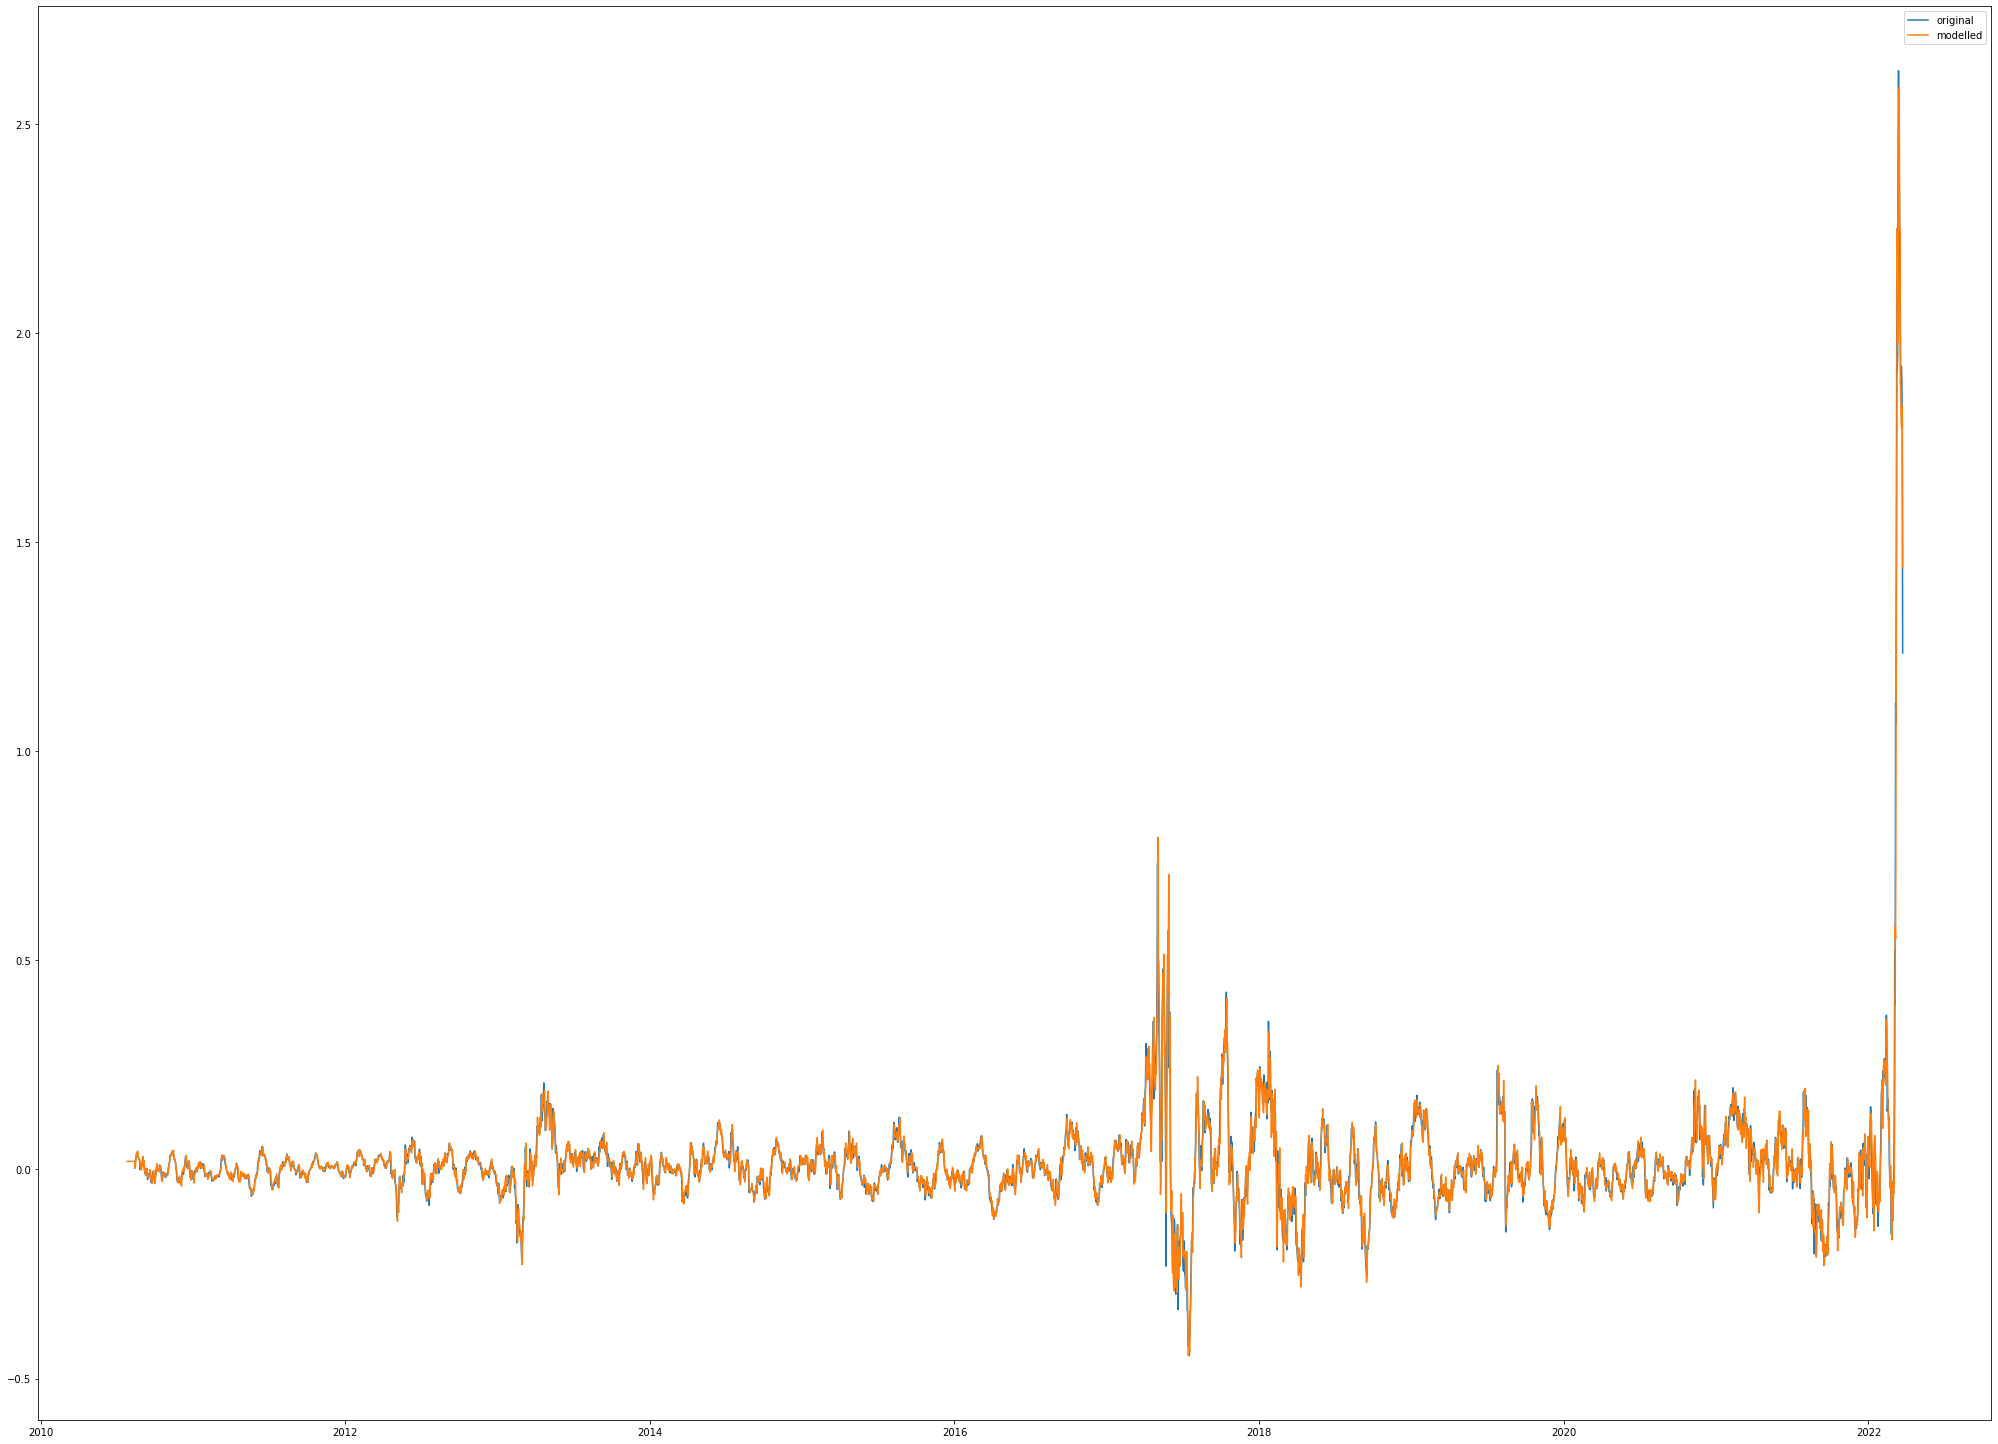

                               SARIMAX Results                                
Dep. Variable:                   rate   No. Observations:                 4260
Model:               ARIMA(17, 0, 17)   Log Likelihood                8826.670
Date:                Thu, 31 Mar 2022   AIC                         -17581.341
Time:                        15:28:41   BIC                         -17352.488
Sample:                    07-26-2010   HQIC                        -17500.478
                         - 03-24-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.021      0.928      0.353      -0.021       0.060
ar.L1          1.0650      0.219      4.855      0.000       0.635       1.495
ar.L2          0.1438      0.316      0.454      0.6

In [47]:
arima_mod = ARIMA(rm, order = (17,0,17))
res = arima_mod.fit()
orig = plt.plot(rm, label = 'original')
arma = plt.plot(res.fittedvalues.drop([res.fittedvalues.index[0]], axis = 0), label = 'modelled')
plt.legend(loc='best')
plt.show(block=True)

print(res.summary())

In [48]:
pred = res.get_prediction(start=1, end=4262, dynamic=False) 

In [49]:
list(pred.predicted_mean)[-4:]

[1.4401231904222263, 1.3827283945077025, 1.386149877755221, 0.8410295057865125]

In [97]:
loss = nn_mod.history['loss']

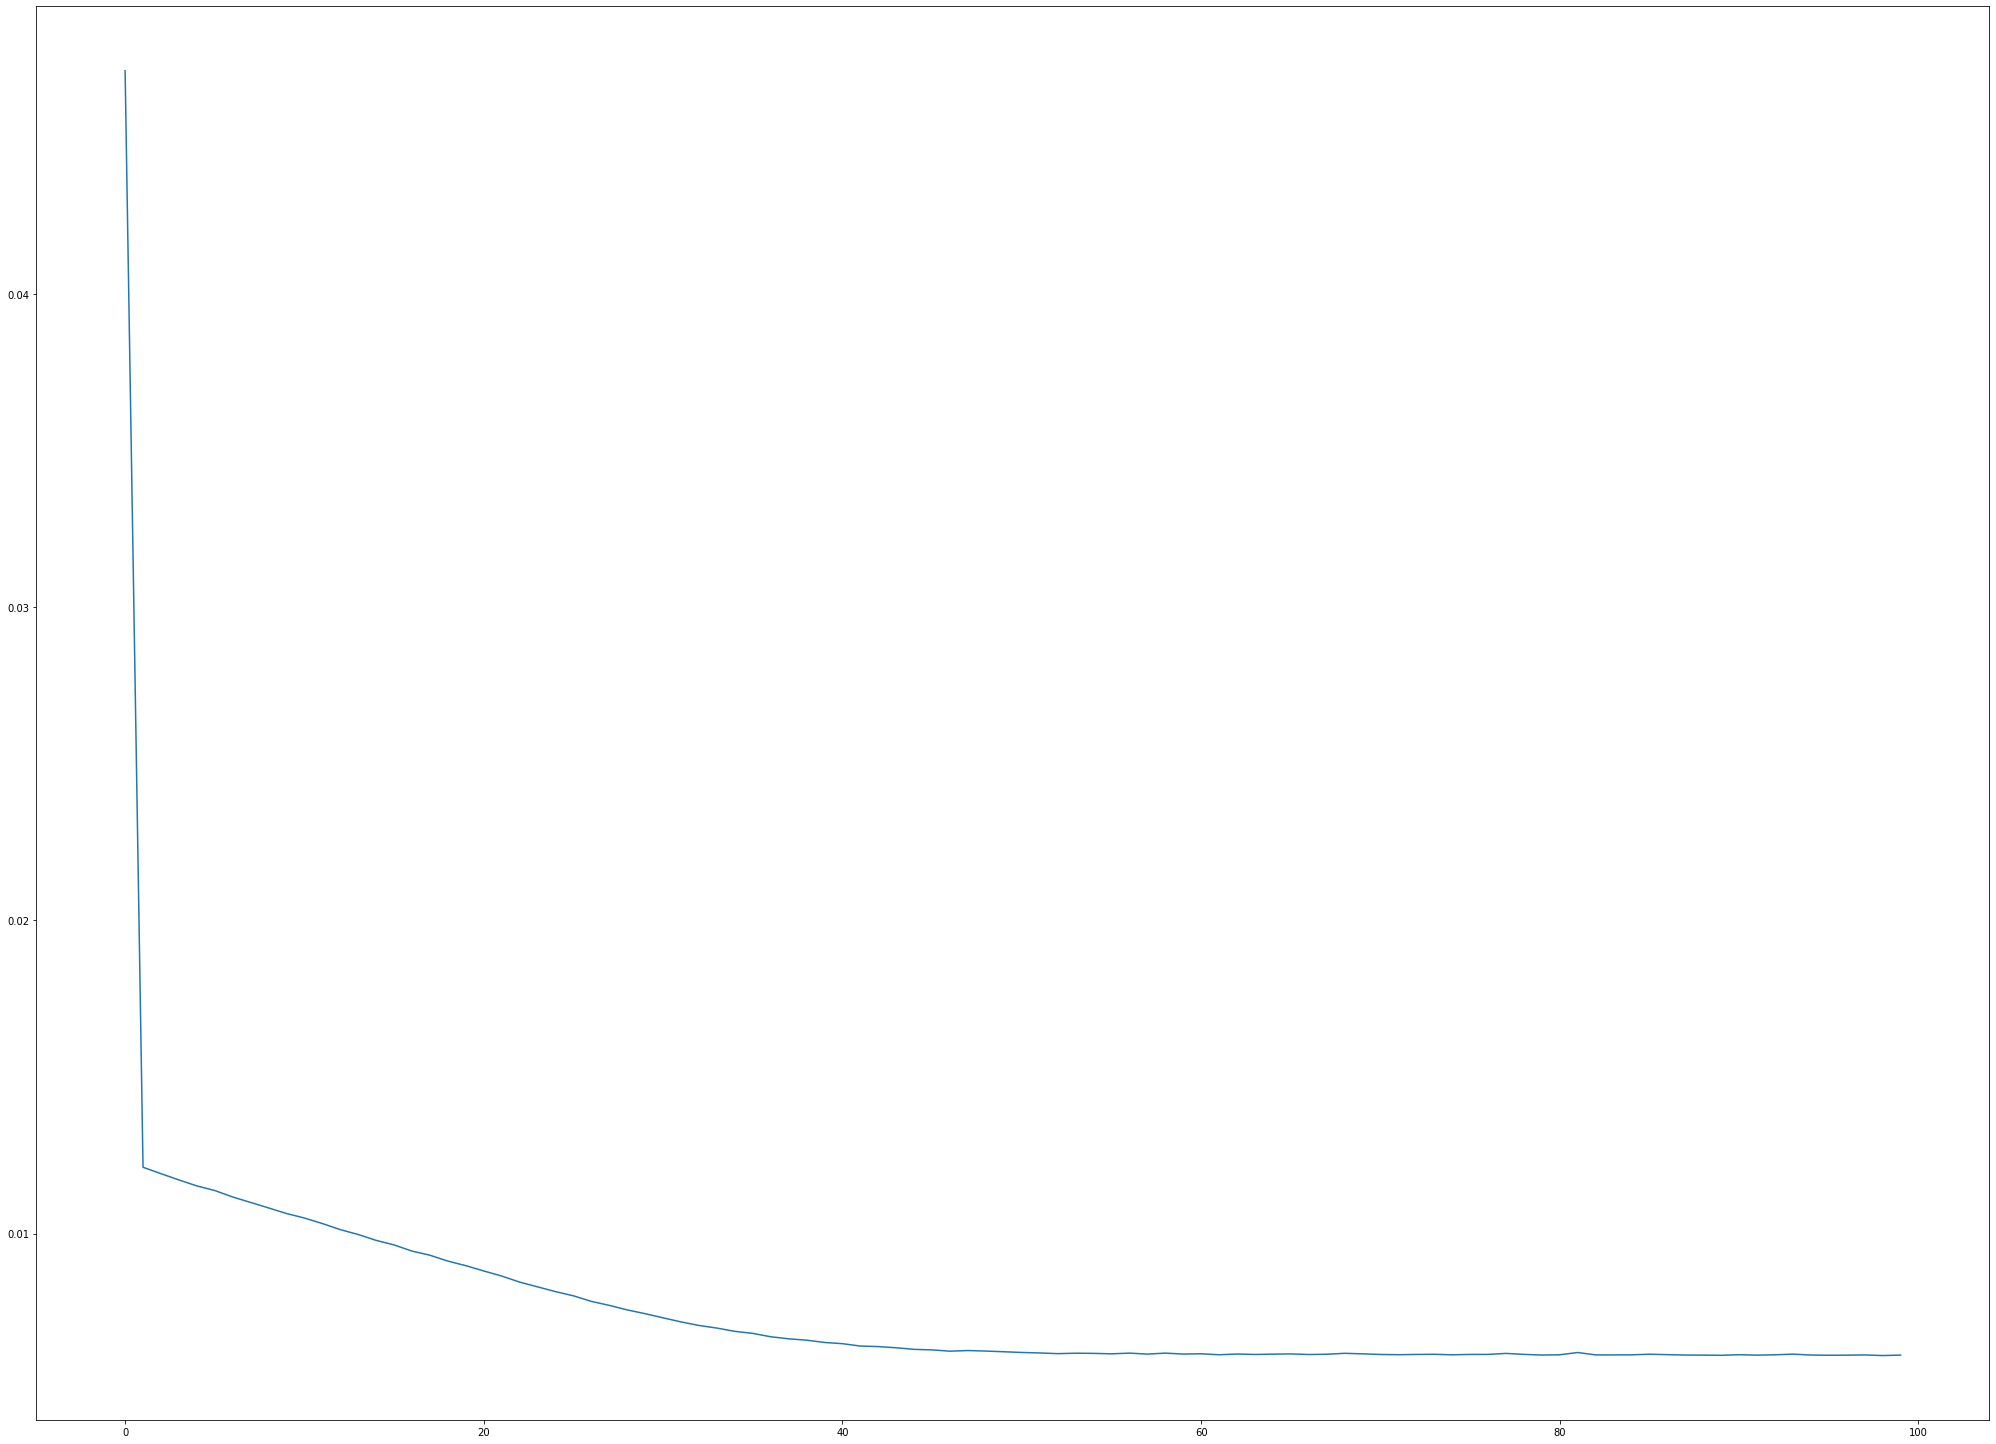

In [98]:
plt.plot(loss)

In [ ]:
#прогноз по ARMA оказался лучше